### Implementation of MDP
##### BY NAJEEB FARIDUDDIN SAIYED 
##### PRN 21070126057
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid PURPLE">

#### Importing necessary libraries

In [4]:
import gym               # Importing OpenAI Gym library for reinforcement learning environments
import numpy as np       # Importing NumPy library for numerical computations
from IPython import display  # Importing display module from IPython for notebook display
from matplotlib import pyplot as plt  # Importing pyplot module from Matplotlib for plotting

# Importing custom environment
from envs import Maze   # Importing custom environment named Maze from envs module

%matplotlib inline  # command to display matplotlib plots inline in Jupyter notebooks

UsageError: unrecognized arguments: # command to display matplotlib plots inline in Jupyter notebooks


#### creating an instance of the Maze environment

In [5]:
# creates an instance of the Maze environment and assigns it to the variable env
env = Maze()

## Taking a Deeper dive on our agent and Environment
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid green">

#### Understanding states and state space of our maze environment
The states consist of a tuple of two integers, both in the range [0, 4], representing the row and column in which the agent is currently located:

The state space (set of all possible states in the task) has 25 elements (all possible combinations of rows and columns):

Information about the state space is stored in the env.observation_space property. In this environment, it is of MultiDiscrete([5 5]) type, which means that it consists of two elements (rows and columns), each with 5 different values.

In [6]:
print(f"For example, the initial state is: {env.reset()}")
print(f"The space state is of type: {env.observation_space}")

For example, the initial state is: (0, 0)
The space state is of type: MultiDiscrete([5 5])


#### Resetting its initial state

In [7]:
# Resetting the environment to its initial state and obtaining the initial state
initial_state = env.reset()

In [8]:
# Displaying the initial state
print(f"The new episode will start in state: {initial_state}")

The new episode will start in state: (0, 0)


##### Actions and action space.

In our environment there are four actions that can be taken up by the agent and it is represented as follows-

0: For Moving Up

1: For Moving Right

2: For Moving Down

3: For Moving Left


In [9]:
print(f"An example of a valid action is: {env.action_space.sample()}")
print(f"The action state is of type: {env.action_space}")

An example of a valid action is: 1
The action state is of type: Discrete(4)


##### Trajectories

A trajectory is the sequence generated by moving from one state to another (both arbitrary)

In [10]:
# Generating trajectory for 'n' moves
env = Maze()  # Create an instance of the Maze environment
state = env.reset()  # Reset the environment and get the initial state
trajectory = []  # Initialize an empty list to store trajectory
n = 4  # Number of moves to generate in the trajectory

# Loop to generate trajectory for 'n' moves
for _ in range(3):  # Iterate over 'n-1' steps (since the loop starts from 0)
    action = env.action_space.sample()  # Choose a random action from the action space
    next_state, reward, done, extra_info = env.step(action)  # Take the chosen action in the environment
    trajectory.append([state, action, reward, done, next_state])  # Store the transition in the trajectory
    state = next_state  # Update the current state to the next state

env.close()  # Close the environment after generating the trajectory

# Display the generated trajectory for each iteration
for i in range(n-1):  # Iterate over 'n-1' steps (since the loop starts from 0)
    print(f"Generated trajectory for iteration {i+1}:\t{trajectory[i]}")  # Print the trajectory for each iteration


Generated trajectory for iteration 1:	[(0, 0), 3, -1.0, False, (0, 0)]
Generated trajectory for iteration 2:	[(0, 0), 2, -1.0, False, (1, 0)]
Generated trajectory for iteration 3:	[(1, 0), 1, -1.0, False, (1, 0)]


#### Episode
An episode is a trajectory that goes from the initial state of the process to the final one:

In [11]:
# Generating episodes
env = Maze()  # Create an instance of the Maze environment
state = env.reset()  # Reset the environment and get the initial state
episode = []  # Initialize an empty list to store the episode transitions
done = False  # Flag to indicate whether the episode is done or not

# Loop to generate the episode until it's completed
while not done:
    action = env.action_space.sample()  # Choose a random action from the action space
    next_state, reward, done, extra_info = env.step(action)  # Take the chosen action in the environment
    episode.append([state, action, reward, done, next_state])  # Store the transition in the episode
    state = next_state  # Update the current state to the next state

env.close()  # Close the environment after generating the episode

# Display the generated episode
print(f"Episode:\n{episode}")  # Print the generated episode

Episode:
[[(0, 0), 1, -1.0, False, (0, 1)], [(0, 1), 2, -1.0, False, (1, 1)], [(1, 1), 2, -1.0, False, (2, 1)], [(2, 1), 0, -1.0, False, (1, 1)], [(1, 1), 1, -1.0, False, (1, 1)], [(1, 1), 0, -1.0, False, (0, 1)], [(0, 1), 2, -1.0, False, (1, 1)], [(1, 1), 1, -1.0, False, (1, 1)], [(1, 1), 3, -1.0, False, (1, 1)], [(1, 1), 3, -1.0, False, (1, 1)], [(1, 1), 0, -1.0, False, (0, 1)], [(0, 1), 0, -1.0, False, (0, 1)], [(0, 1), 0, -1.0, False, (0, 1)], [(0, 1), 0, -1.0, False, (0, 1)], [(0, 1), 2, -1.0, False, (1, 1)], [(1, 1), 1, -1.0, False, (1, 1)], [(1, 1), 0, -1.0, False, (0, 1)], [(0, 1), 0, -1.0, False, (0, 1)], [(0, 1), 0, -1.0, False, (0, 1)], [(0, 1), 3, -1.0, False, (0, 0)], [(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 2, -1.0, False, (1, 0)], [(1, 0), 1, -1.0, False, (1, 0)], [(1, 0), 2, -1.0, False, (2, 0)], [(2, 0), 3, -1.0, False, (2, 0)], [(2, 0), 1, -1.0, False, (2, 0)], [(2, 0), 1, -1.0, False, (2, 0)], [(2, 0), 2, -1.0, False, (3, 0)], [(3, 0), 0, -1.0, False, (2, 0)], [(2,

In [12]:
# Print the total number of steps (transitions) in the episode
print("Total episodes taken:", len(episode))

Total episodes taken: 64


#### Rewards
A reward is numerical feedback that the environment generates when the agent takes an action *a* in a state *s*

In [13]:
# Import the Maze environment
env = Maze()

# Reset the environment to its initial state and obtain the starting state
state = env.reset()

# Choose a random action from the action space
action = env.action_space.sample()

# Take a step in the environment by applying the chosen action
# and observe the next state, the reward, whether the episode is done, and any additional information
next_state, reward, done, info = env.step(action)

# Print the information about the reward obtained by taking the action in the state
print(f"We achieved a reward of {reward} by taking action {action} in state {state}")

We achieved a reward of -1.0 by taking action 0 in state (0, 0)


In [ ]:
env = Maze()
state = env.reset()
done = False 
gamma = 0.99
t = 0
G_0 = 0
while not done:
    action = env.action_space.sample()
    _,reward, done, _ = env.step(action)
    G_0 += gamma ** t*reward
    t += 1
env.close()
print(
    f""" it took us {t} moves to find the exit,
    and each reward r(s,a)=-1, so the return amounts to {G_0}""")

## Displaying Current state of the environment

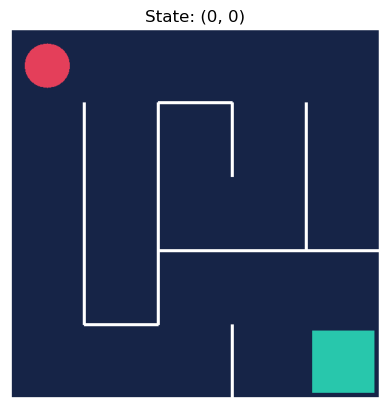

In [14]:
# Rendering the current state of the environment as an RGB array
frame = env.render(mode='rgb_array')

# Turning off the axis in the plot
plt.axis('off')

# Setting the title of the plot to indicate the current state
plt.title(f"State: {initial_state}")

# Displaying the rendered frame as an image
plt.imshow(frame)


## Discrete Action Space

In a discrete action space, the possible actions are typically represented as discrete integers. For example:

- Move left: 0
- Move right: 1
- Move up: 2
- Move down: 3
  
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid green">

In [15]:
# Set the action for the agent
action = 2
# Execute the action in the environment and get the resulting state, reward, done flag, and additional information
next_state, reward, done, info = env.step(action)
# Print the state after the agent's move
print(f"After moving, the agent is in state: {next_state}")
# Print the reward obtained after the agent's move
print(f"After moving, we got a reward of: {reward}")
# Print whether the task is finished after the agent's move
print("After moving, the task is", "" if done else "not", "finished")

After moving, the agent is in state: (1, 0)
After moving, we got a reward of: -1.0
After moving, the task is not finished


#### Render the new state

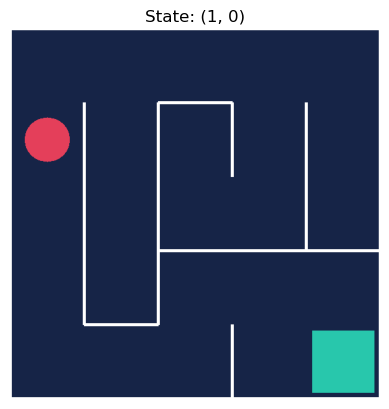

In [16]:
# Render the environment frame as an RGB array
frame = env.render(mode='rgb_array')
# Turn off the axis for the plot
plt.axis('off')
# Set the title of the plot to display the current state
plt.title(f"State: {next_state}")
# Display the rendered frame as an image
plt.imshow(frame)

After moving, the agent is in state: (2, 0)
After moving, we got a reward of: -1.0
After moving, the task is not finished
After moving, the agent is in state: (3, 0)
After moving, we got a reward of: -1.0
After moving, the task is not finished
After moving, the agent is in state: (4, 0)
After moving, we got a reward of: -1.0
After moving, the task is not finished


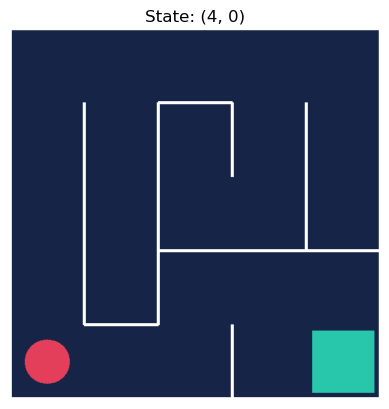

In [17]:
action = 2
next_state, reward, done, info = env.step(action)
print(f"After moving, the agent is in state: {next_state}")
print(f"After moving, we got a reward of: {reward}")
print("After moving, the task is", "" if done else "not", "finished")

action = 2
next_state, reward, done, info = env.step(action)
print(f"After moving, the agent is in state: {next_state}")
print(f"After moving, we got a reward of: {reward}")
print("After moving, the task is", "" if done else "not", "finished")

action = 2
next_state, reward, done, info = env.step(action)
print(f"After moving, the agent is in state: {next_state}")
print(f"After moving, we got a reward of: {reward}")
print("After moving, the task is", "" if done else "not", "finished")

frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f"State: {next_state}")
plt.imshow(frame)

<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid green">

After moving, the agent is in state: (4, 1)
After moving, we got a reward of: -1.0
After moving, the task is not finished
After moving, the agent is in state: (4, 2)
After moving, we got a reward of: -1.0
After moving, the task is not finished


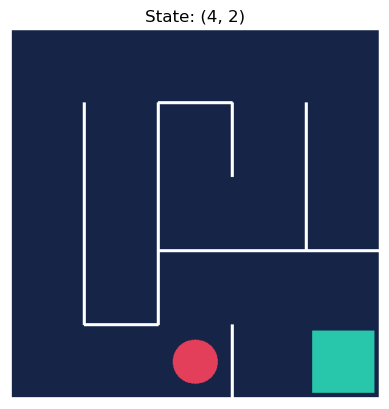

In [18]:
action = 1
next_state, reward, done, info = env.step(action)
print(f"After moving, the agent is in state: {next_state}")
print(f"After moving, we got a reward of: {reward}")
print("After moving, the task is", "" if done else "not", "finished")

action = 1
next_state, reward, done, info = env.step(action)
print(f"After moving, the agent is in state: {next_state}")
print(f"After moving, we got a reward of: {reward}")
print("After moving, the task is", "" if done else "not", "finished")

frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f"State: {next_state}")
plt.imshow(frame)

<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid green">

After moving, the agent is in state: (3, 2)
After moving, we got a reward of: -1.0
After moving, the task is not finished


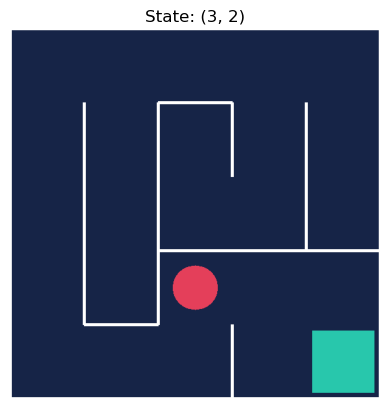

In [19]:
action = 0
next_state, reward, done, info = env.step(action)
print(f"After moving, the agent is in state: {next_state}")
print(f"After moving, we got a reward of: {reward}")
print("After moving, the task is", "" if done else "not", "finished")

frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f"State: {next_state}")
plt.imshow(frame)

<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid green">

After moving, the agent is in state: (3, 3)
After moving, we got a reward of: -1.0
After moving, the task is not finished
After moving, the agent is in state: (3, 4)
After moving, we got a reward of: -1.0
After moving, the task is not finished
After moving, the agent is in state: (3, 4)
After moving, we got a reward of: -1.0
After moving, the task is not finished


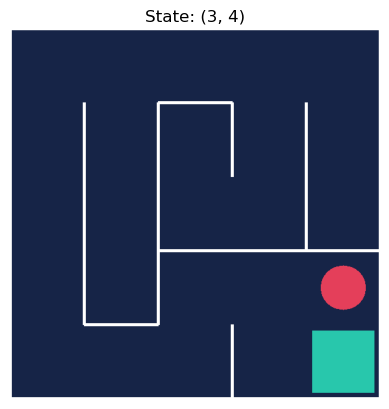

In [20]:
action = 1
next_state, reward, done, info = env.step(action)
print(f"After moving, the agent is in state: {next_state}")
print(f"After moving, we got a reward of: {reward}")
print("After moving, the task is", "" if done else "not", "finished")

action = 1
next_state, reward, done, info = env.step(action)
print(f"After moving, the agent is in state: {next_state}")
print(f"After moving, we got a reward of: {reward}")
print("After moving, the task is", "" if done else "not", "finished")

action = 1
next_state, reward, done, info = env.step(action)
print(f"After moving, the agent is in state: {next_state}")
print(f"After moving, we got a reward of: {reward}")
print("After moving, the task is", "" if done else "not", "finished")

frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f"State: {next_state}")
plt.imshow(frame)

<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid green">

After moving, the agent is in state: (4, 4)
After moving, we got a reward of: -1.0
After moving, the task is  finished


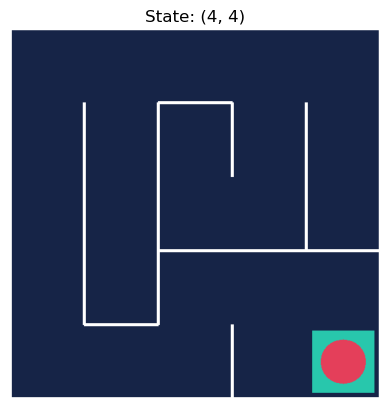

In [21]:
action = 2
next_state, reward, done, info = env.step(action)
print(f"After moving, the agent is in state: {next_state}")
print(f"After moving, we got a reward of: {reward}")
print("After moving, the task is", "" if done else "not", "finished")

frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f"State: {next_state}")
plt.imshow(frame)

And just like that we reached our optimal/ final position

<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid green">

#### Closing the environment

Environment Shutdown: The env.close() function is used to gracefully terminate the RL environment. This includes releasing any resources associated with the environment, such as memory allocations, file handles, or connections to simulators.

In [22]:
env.close()

Environment closed successfully

<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid PURPLE">
##### BY NAJEEB FARIDUDDIN SAIYED 
##### PRN 21070126057
<p style="font-family:arial; font-weight:bold; letter-spacing: 2px; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid PURPLE">